# **0.0. IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings( 'ignore' )

sns.set(style='darkgrid')
plt.rcParams["figure.figsize"] = (15,6)

##**0.1. HELPER FUNCTION**

In [2]:
def get_label(g):
  for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(round(height)),
            ha="center", color='white')

# **1.0. READING DATA**

In [3]:
df_2019 = pd.read_csv("/content/drive/MyDrive/Datasests/all/multiple_choice_responses.csv")
df_2020 = pd.read_csv("/content/drive/MyDrive/Datasests/all/kaggle_survey_2020_responses.csv")
df_2021 = pd.read_csv("/content/drive/MyDrive/Datasests/all/kaggle_survey_2021_responses.csv")

In [4]:
df_2021.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool

In [44]:
df_2019.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,...,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par..

In [13]:
df_2020.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

# **2.0. DATA PREPRECESSING**

In [ ]:
# Select just the column that i will use
df_2019 = df_2019[['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
df_2020 = df_2020[['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
df_2021 = df_2021[['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5']]

# rename columns

cols = {'Time from Start to Finish (seconds)':'Time_start_to_finish', 'Q1':'age', 'Q2':'gender', 'Q3':'country_reside', 
        'Q4':'formal_education', 'Q5':'title_job', 'Q6':'years_writing_code', }
df_2019.rename(columns=cols, inplace=True)

cols = {'Time from Start to Finish (seconds)':'Time_start_to_finish', 'Q1':'age', 'Q2':'gender', 'Q3':'country_reside', 
        'Q4':'formal_education', 'Q5':'title_job', 'Q6':'years_writing_code', }
df_2020.rename(columns=cols, inplace=True)

cols = {'Time from Start to Finish (seconds)':'Time_start_to_finish', 'Q1':'age', 'Q2':'gender', 'Q3':'country_reside', 
        'Q4':'formal_education', 'Q5':'title_job', 'Q6':'years_writing_code', }
df_2021.rename(columns=cols, inplace=True)

df_2019.drop(0, axis=0, inplace=True)
df_2020.drop(0, axis=0, inplace=True)
df_2021.drop(0, axis=0, inplace=True)

# creare a new column to indentify what year the daset belongs
df_2019['year'] = '2019'
df_2020['year'] = '2020'
df_2021['year'] = '2021'

aux = pd.concat([df_2019, df_2020], ignore_index=True)
df_all = pd.concat([aux, df_2021], ignore_index=True)

#Change the extense name IRAN and UK
df_all['country_reside'] = df_all['country_reside'].str.replace('Iran, Islamic Republic of...', 'Iran')
df_all['country_reside'] = df_all['country_reside'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
df_all['country_reside'] = df_all['country_reside'].replace('Hong Kong (S.A.R.)', 'Hong Kong')

# gender the gender

df_all['gender'] = df_all['gender'].str.replace('Female', 'Woman')
df_all['gender'] = df_all['gender'].str.replace('Male','Man')

# Creare a new column continent 
map_continent = {'India':'Asia', 'Indonesia':'Asia', 'Pakistan':'Asia', 'Mexico':'North America', 'Russia':'Asia', 'Turkey':'Asia',
                'Australia':'Australia', 'Nigeria':'Africa', 'Greece':'Europe', 'Belgium':'Europe', 'Japan':'Asia', 'Egypt':'Africa',
                'Singapore':'Asia', 'Brazil':'South America', 'Poland':'Europe', 'China':'Asia','Iran':'Asia', 'United States of America':'North America',
                'Italy':'Europe', 'Viet Nam':'Asia', 'Israel':'Asia', 'Peru':'South America', 'South Africa':'Africa', 'Other':'Other','Spain':'Europe', 'Bangladesh':'Asia',
                'United Kingdom':'Europe', 'France':'Europe','Switzerland':'Europe', 'Algeria':'Africa', 'Tunisia':'Africa', 'Argentina':'South America', 'Sweden':'Europe',
                'Colombia':'South America','I do not wish to disclose my location':'I do not wish to disclose my location', 'Canada':'North America','Chile':'South America', 
                'Netherlands':'Europe', 'Ukraine':'Europe', 'Saudi Arabia':'Asia', 'Romania':'Europe','Morocco':'Africa', 'Austria':'Europe', 'Taiwan':'Asia', 'Kenya':'Africa', 'Belarus':'Europe', 
                'Ireland':'Europe','Portugal':'Europe', 'Hong Kong':'Asia', 'Denmark':'Europe', 'Germany':'Europe','South Korea':'Asia', 'Philippines':'Asia', 'Sri Lanka':'Asia', 
                'United Arab Emirates':'Asia','Uganda':'Africa', 'Ghana':'Africa', 'Malaysia':'Asia', 'Thailand':'Asia', 'Nepal':'Asia', 'Kazakhstan':'Asia','Ethiopia':'Africa', 'Iraq':'Asia', 
                'Ecuador':'South America', 'Norway':'Europe', 'Czech Republic':'Europe', 'Kenya':'Africa', 'Republic of Korea':'Asia', 'New Zealand':'Oceanian', 'Hungary':'Europe'}

df_all['continent'] = df_all['country_reside'].map(map_continent)


# change types and trasnforming time ( seconds ) to minutes
df_all['year'] = df_all['year'].astype(int)
df_all['Time_start_to_finish'] = df_all['Time_start_to_finish'].astype(int)
df_all['Time_start_to_finish'] = df_all['Time_start_to_finish'].apply(lambda x: round(x / 60, ndigits=2))


In [ ]:
df_all.sample()

,Time_start_to_finish,age,gender,country_reside,formal_education,title_job,year,continent
3387,8.47,40-44,Man,Poland,Doctoral degree,Research Scientist,2019,Europe


# **3.0. EXPLORATORY DATA ANALYSIS (EDA)**

# **3.1. DATA ABOU SURVEY**

## **3.1.1. TIME TO FILL THE SURVEY**

In [ ]:
print(f'minimum time to complete the survey: {df_all["Time_start_to_finish"].min()} minutes')
print(f'maximum time to complete the survey: {df_all["Time_start_to_finish"].max()} minutes')

minimum time to complete the survey: 0.33 minutes
maximum time to complete the survey: 41477.55 minutes


## **3.1.2. NUMBER OF SURVEY PARTICIPANTS PER YEAR**

In [ ]:
df_year = df_all.groupby(['year'], as_index=False)['age'].count().rename( columns = {"age":'total'})
df_year = pd.DataFrame(df_year)

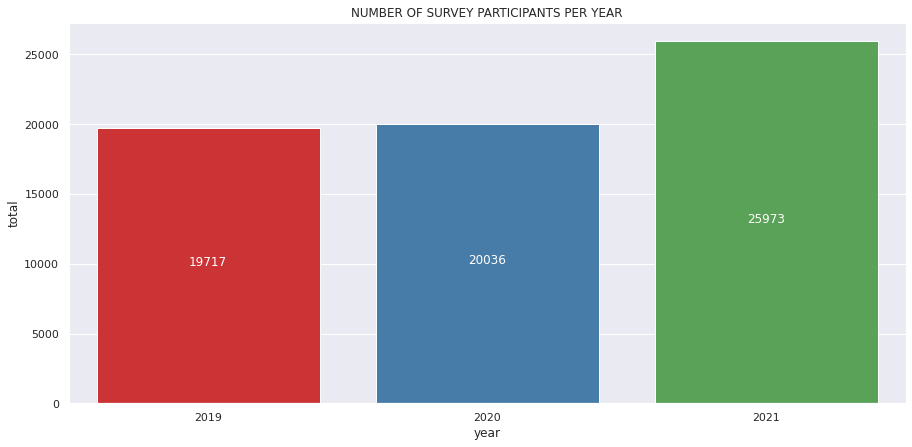

In [ ]:
plt.figure(figsize=(15, 7))
g = sns.barplot(x='year', y='total', data = df_year, palette='Set1')
plt.title('NUMBER OF SURVEY PARTICIPANTS PER YEAR')
get_label(g)

# **3.2. DATA ABOUT PARTICIPANTS OF SURVEY**

## **3.2.1 AGE**

In [ ]:
df_age = df_all.groupby(['age', 'year'], as_index=False)['gender'].count().rename( columns = {"gender":'total'})
df_age = pd.DataFrame(df_age)

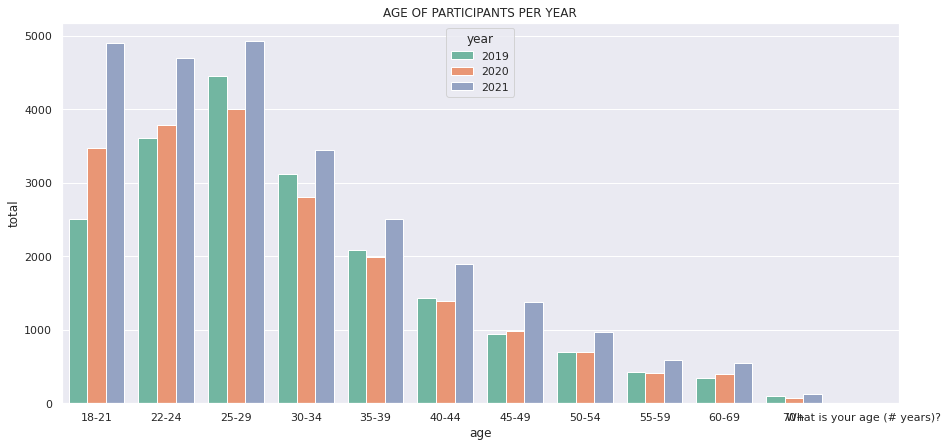

In [ ]:
plt.figure(figsize=(15, 7))
g = sns.barplot(x='age', y='total', hue='year', data = df_age, palette='Set2')
plt.title('AGE OF PARTICIPANTS PER YEAR');

**In 2021 there was an increase in research participants in all age groups compared to 2020 and 2019**

## **3.2.2. GENDER**

In [ ]:
mask = (df_all['gender'] != 'Prefer not to say')
df_gender =  df_all.loc[mask].groupby(['gender', 'year'], as_index=False)['age'].count().rename( columns = {'age':'total'})

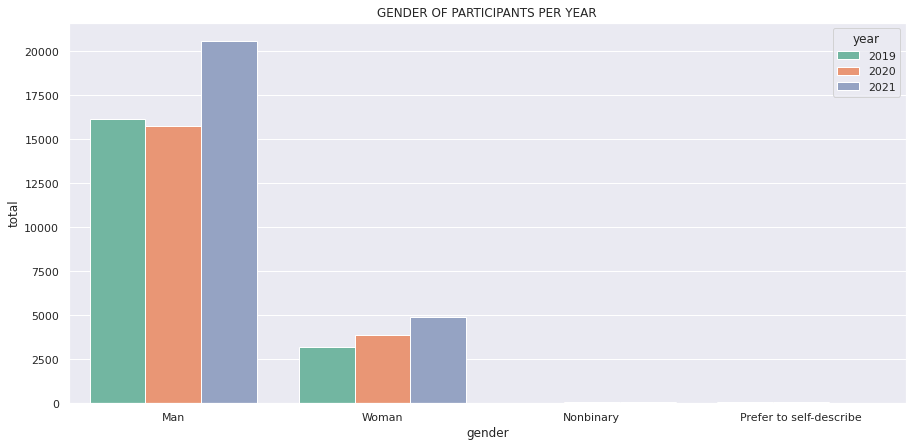

In [ ]:
plt.figure(figsize=(15, 7))
order = ['Man', 'Woman', 'Nonbinary', 'Prefer to self-describe']
g = sns.barplot(x='gender', y='total', hue='year', data = df_gender, order=order, palette='Set2')
plt.title('GENDER OF PARTICIPANTS PER YEAR');

**The number of male and female participants also increased in 2021, compared to 2020 and 2021. There is still a large difference between women and men, according to the Kaggle survey.**

## **3.2.3. TITLE JOB**

In [ ]:
title_job =  df_all.groupby(['title_job', 'year'], as_index=False)['age'].count().rename( columns = {'age':'total'})

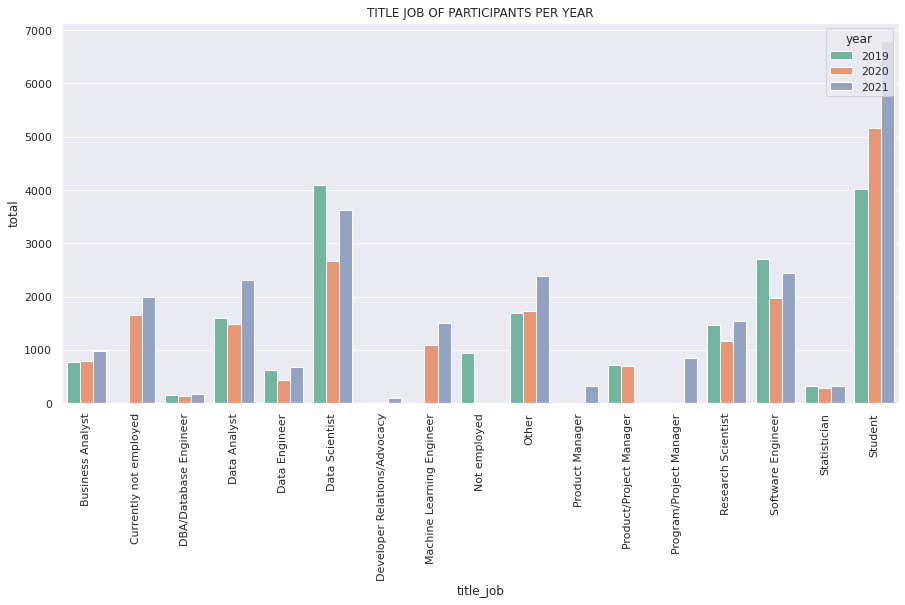

In [ ]:
plt.figure(figsize=(15, 7))
g = sns.barplot(x='title_job', y='total', hue='year', data = title_job, palette='Set2')
plt.title('TITLE JOB OF PARTICIPANTS PER YEAR');
plt.xticks(rotation=90);

**Students are the biggest participants in Kaggle's research and it has been growing every year.**

## **3.2.4 PROGRAMMING LANGUAGE**

In [62]:
def get_count(question_num, parts, data):
    questions = []
    questions = ['Q'+ str(question_num) +'_Part_'+ str(j) for j in range(1, parts)]
    questions.append('Q'+ str(question_num) + '_OTHER')
    
    categories = []
    values = []
    for i in questions:
        category = data[i].value_counts().index[0]
        val = data[i].value_counts()[0]
        
        categories.append(category)
        values.append(val)
       
    combined_df = pd.DataFrame()
    combined_df['Category'] = categories
    combined_df['Value'] = values
    
    combined_df = combined_df.sort_values(['Value'],ascending=False)
    
    return combined_df


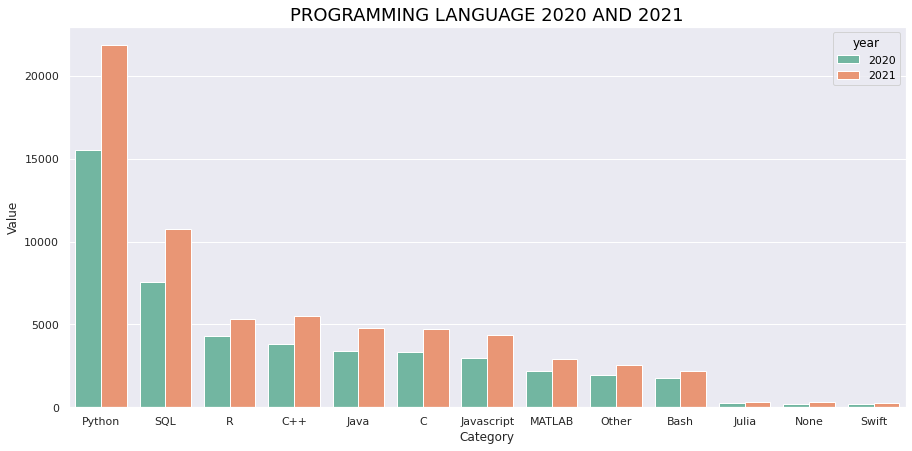

In [74]:
df1 = get_count(7, 13, df_2020)
df2 = get_count(7, 13, df_2021)
df1['year'] = 2020
df2['year'] = 2021
df_programing = pd.concat([df1, df2], ignore_index=True)

plt.figure(figsize=(15, 7))
sns.barplot(x='Category', y='Value', hue='year', data=df_programing, palette='Set2');
plt.title('PROGRAMMING LANGUAGE 2020 AND 2021', size=18);

## **3.2.5 INTEGRATED DEVELOPMENT ENVIRONMENT 2020 and 2021**

In [173]:
integrated_development_2020 = get_count(9, 11, df_2020)
integrated_development_2021 = get_count(9, 12, df_2021)

integrated_development_2020['year'] = 2020
integrated_development_2021['year'] = 2021
df_ide = pd.concat([integrated_development_2020, integrated_development_2021], ignore_index=True)
df_ide['Category'] = df_ide['Category'].apply(lambda x: x.strip(' '))

map = {'Jupyter (JupyterLab, Jupyter Notebooks, etc)':'Jupyter Notebook',
       'Visual Studio Code (VSCode)':'VSCode','PyCharm':'PyCharm','RStudio':'RStudio',
       'Spyder':'Spyder', 'Notepad++':'Notepad++','Sublime Text':'Sublime Text',
       'Visual Studio':'Visual Studio','MATLAB':'MATLAB', 'Vim / Emacs':'Vim / Emacs',
       'Other':'Other', 'Jupyter Notebook':'Jupyter Notebook'}

df_ide['Category'] = df_ide['Category'].map(map)

In [174]:
df_ide['Category'].values

array(['Jupyter Notebook', 'VSCode', 'PyCharm', 'RStudio', 'Spyder',
       'Notepad++', 'Sublime Text', 'Visual Studio', 'MATLAB',
       'Vim / Emacs', 'Other', 'Jupyter Notebook', 'VSCode', 'PyCharm',
       'Jupyter Notebook', 'RStudio', 'Visual Studio', 'Notepad++',
       'Spyder', 'Sublime Text', 'MATLAB', 'Vim / Emacs', 'Other'],
      dtype=object)

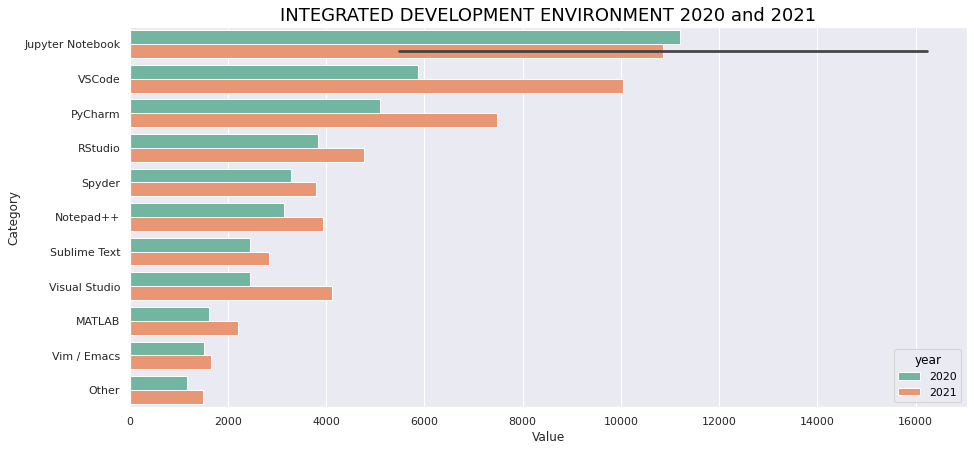

In [175]:
plt.figure(figsize=(15, 7))
sns.barplot(y='Category', x='Value', hue='year', data=df_ide, palette='Set2');
plt.title('INTEGRATED DEVELOPMENT ENVIRONMENT 2020 and 2021', size=18);

## **WHICH MANAGED MACHINE LEARNING PRODUCTS THE PARTICIPANTS WISH TO BECOME FAMILIAR**

In [178]:
def get_count_2(question_num, parts, data):
    questions = []
    questions = ['Q'+ str(question_num) +'_B_Part_'+ str(j) for j in range(1, parts)]
    questions.append('Q'+ str(question_num) + '_B_OTHER')
    
    categories = []
    values = []
    for i in questions:
        category = data[i].value_counts().index[0]
        val = data[i].value_counts()[0]
        
        categories.append(category)
        values.append(val)
       
    combined_df = pd.DataFrame()
    combined_df['Category'] = categories
    combined_df['Value'] = values
    
    combined_df = combined_df.sort_values(['Value'],ascending=False)
    
    return combined_df

In [189]:
df_Q35_2020 = get_count_2(35, 10, df_2020)
df_Q38_2021 = get_count_2(38, 11, df_2021)

df_Q35_2020['year'] = 2020
df_Q38_2021['year'] = 2021
df_become_falimiar = pd.concat([df_Q35_2020, df_Q38_2021], ignore_index=True)
df_become_falimiar['Category'] = df_become_falimiar['Category'].apply(lambda x: x.strip(' '))

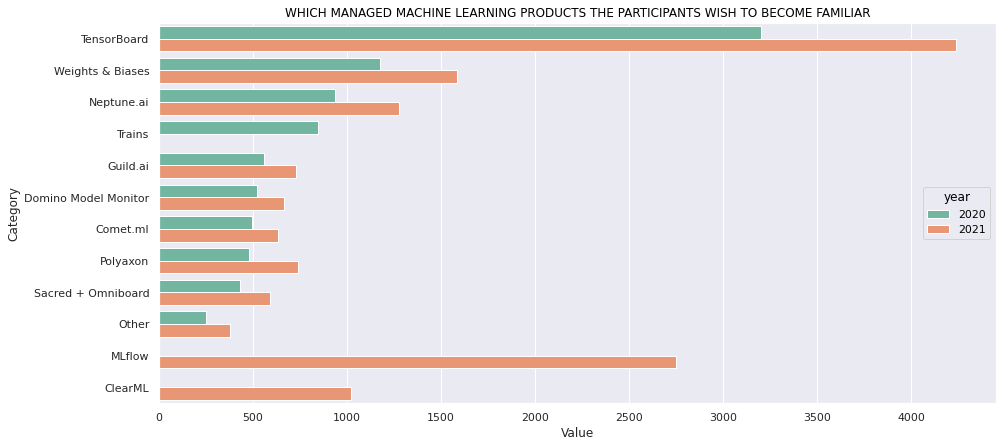

In [194]:
plt.figure(figsize=(15, 7))
sns.barplot(y='Category', x='Value', hue='year', data=df_become_falimiar, palette='Set2');
plt.title('WHICH MANAGED MACHINE LEARNING PRODUCTS THE PARTICIPANTS WISH TO BECOME FAMILIAR');

**In 2020 and 2021, TensorBoard is the Managed Magine Learning products that participants most want to learn.**

**In 2021, two new technologies appeared that participants have been aiming for in the last 2 years: MLFlow and ClearML.**

# **3.3. GEOGRAPGIC DATA**

## **3.3.1. COUNTRY**

In [ ]:
mask_country = (df_all['country_reside'] != 'Other')
df_country = df_all.loc[mask_country].groupby(['country_reside', 'year'], as_index=False)['gender'].count().rename( columns = {"gender":'total'})
df_country = pd.DataFrame(df_country)
df_country_10 = df_country.nlargest(30, 'total')

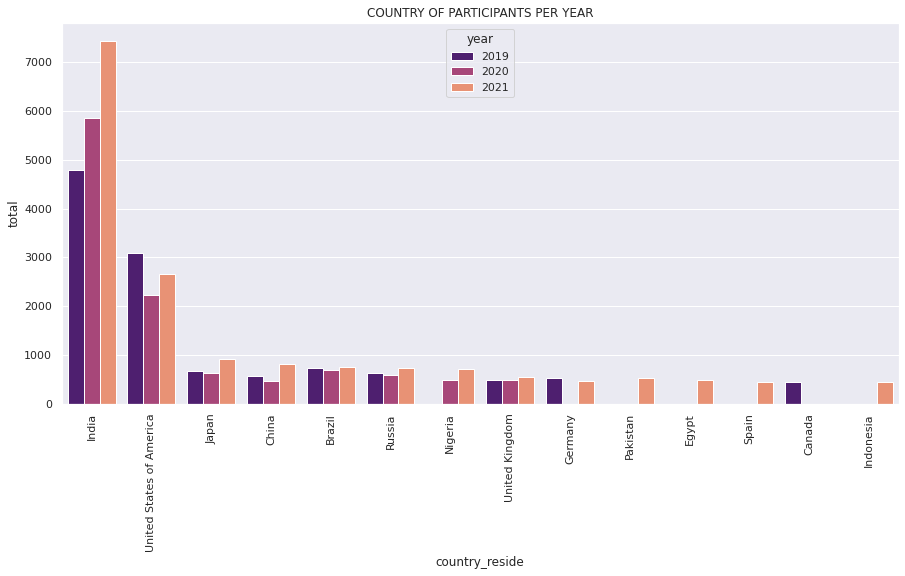

In [ ]:
plt.figure(figsize=(15, 7))
g = sns.barplot(x='country_reside', y='total', hue='year', data = df_country_10, palette='magma')
plt.title('COUNTRY OF PARTICIPANTS PER YEAR');
plt.xticks(rotation=90);

**India is the top country of participants, ranking first in the 2019, 2020 and 2021 surveys.**

## **3.3.2. CONTINENT**

In [ ]:
mask = (df_all['continent'] != 'Other') & (df_all['continent'] != 'I do not wish to disclose my location')
df1_contnent = df_all.loc[mask].groupby(['continent', 'year'], as_index=False)['age'].count().rename( columns = {'age':'total'})

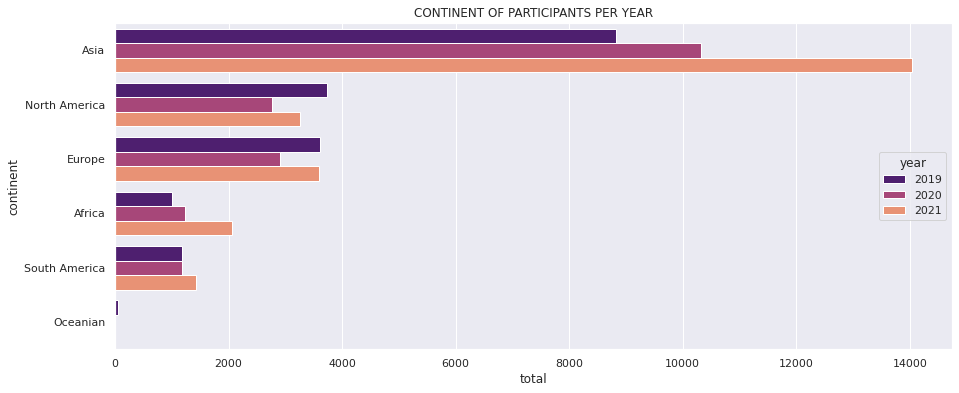

In [ ]:
order = ['Asia', 'North America', 'Europe', 'Africa', 'South America', 'Oceanian']
g = sns.barplot(y='continent', x='total', hue='year', data = df1_contnent, order=order, palette='magma')
plt.title('CONTINENT OF PARTICIPANTS PER YEAR');

**Asian continent loves Kaggle - Mainly in India**